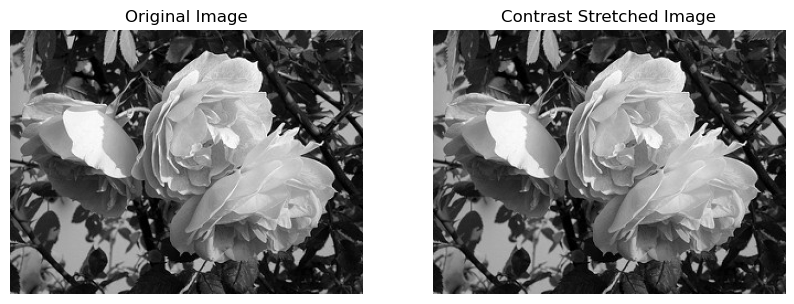

Original Image Intensity Range:
I_min (minimum intensity): 0
I_max (maximum intensity): 255

Stretched Image Intensity Range:
New_min: 0
New_max: 255


In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image (you can replace this with any image path)
image_path = os.path.join(os.getcwd(), 'data', 'images', 'roses.jpg')

# Load the original image in grayscale
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Define the linear contrast stretching function
def linear_contrast_stretching(img, new_min=0, new_max=255):
    I_min = np.min(img)  # Minimum intensity in the original image
    I_max = np.max(img)  # Maximum intensity in the original image

    # Apply the contrast stretching formula
    stretched_img = ((img - I_min) / (I_max - I_min)) * (new_max - new_min) + new_min

    # Convert the result back to uint8 (since the formula may produce float values)
    stretched_img = np.clip(stretched_img, new_min, new_max)  # Ensures the values are in the new_min-new_max range
    stretched_img = stretched_img.astype(np.uint8)
    
    # Return the stretched image and the intensity values for analysis
    return stretched_img, I_min, I_max

# Apply the contrast stretching
stretched_image, I_min, I_max = linear_contrast_stretching(image)

# Display original and stretched images
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

# Stretched image
plt.subplot(1, 2, 2)
plt.title("Contrast Stretched Image")
plt.imshow(stretched_image, cmap='gray')
plt.axis('off')

plt.show()

# Print the I_min and I_max values for analysis
print(f"Original Image Intensity Range:")
print(f"I_min (minimum intensity): {I_min}")
print(f"I_max (maximum intensity): {I_max}")

# Analyze the new intensity range
new_min = np.min(stretched_image)
new_max = np.max(stretched_image)
print(f"\nStretched Image Intensity Range:")
print(f"New_min: {new_min}")
print(f"New_max: {new_max}")